### This Project is Submitted By Group: NiSaRaViPr
Nikhil Kumar (1903210)  
Satvik Bhatnagar (1903215)  
Rajat Chakrabarty (1903212)  
Vivek Narway (1903221)  
Prakhar Gupta (1906327)

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from tqdm import tqdm
tqdm.pandas() # To monitor progress of pandas operations
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Download the data for the 20 Newsgroups Data set
newsgroupsTrain = fetch_20newsgroups(remove=("headers","footers","quotes"))
newsgroupsTest = fetch_20newsgroups(subset = "test",remove=("headers","footers","quotes"))
traindf = pd.DataFrame({"Data" : newsgroupsTrain.data, "Target" : newsgroupsTrain.target})
testdf = pd.DataFrame({"Data" : newsgroupsTest.data, "Target" : newsgroupsTest.target})

In [3]:
traindf = pd.concat([traindf,testdf],ignore_index = True)
print(traindf['Data'][4])

From article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):


My understanding is that the 'expected errors' are basically
known bugs in the warning system software - things are checked
that don't have the right values in yet because they aren't
set till after launch, and suchlike. Rather than fix the code
and possibly introduce new bugs, they just tell the crew
'ok, if you see a warning no. 213 before liftoff, ignore it'.


In [4]:
# Pre-Processing the text
!pip install contractions
# Remove all Email-IDs
import re
removeEmail = lambda doc: re.sub("[\w\.\+\-]+\@[\w]+(\.([a-z]+))+","",doc)

# Lowercase all text
lowercase = lambda doc: doc.lower()

# Expand all contractions like "don't" -> "do not"
import contractions
expand = lambda doc : contractions.fix(doc)

# Removing all special characters
clean = lambda doc : re.sub("[^a-zA-Z0-9]+"," ",doc) # Replace all special chars with whitespace

# Lemmatize words
# (Group together forms of the same word, eg: walk, walked and walking are replaced with walk)
import nltk
nltk.download("wordnet") # Wordnet is a lexical database for English
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatizeDoc(doc):
    global lemmatizer
    doc = doc.split(" ")
    doc = [lemmatizer.lemmatize(word) for word in doc]
    return " ".join(doc)

# # Remove StopWords
# # This removes common english words like "is","are" etc.
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwordSet = set(stopwords.words("english") + ["max","one","two","get","air","row","day","edu","com",
                                                "giz","edu","bhj","pub"])
def removeStopword(doc):
    global stopwordSet
    doc = doc.split(" ")
    doc = [word for word in doc if word not in stopwordSet]
    return " ".join(doc)

# Remove Numbers
removeNumbers = lambda doc : re.sub("\d+"," ",doc)

# Remove all words of length 2 and lower
def smallWords(doc):
    doc = doc.split(" ")
    doc = [word for word in doc if (len(word) > 2)]
    doc = " ".join(doc)
    return doc

# Apply the Transformations
traindf["Data"] = traindf["Data"].progress_apply(removeEmail)
traindf["Data"] = traindf["Data"].progress_apply(lowercase)
traindf["Data"] = traindf["Data"].progress_apply(expand)
traindf["Data"] = traindf["Data"].progress_apply(clean)
traindf["Data"] = traindf["Data"].progress_apply(removeStopword)
traindf["Data"] = traindf["Data"].progress_apply(lemmatizeDoc)
traindf["Data"] = traindf["Data"].progress_apply(removeNumbers)
traindf["Data"] = traindf["Data"].progress_apply(smallWords)

     |████████████████████████████████| 287 kB 5.1 MB/s 
     |████████████████████████████████| 106 kB 61.2 MB/s 
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


100%|██████████| 18846/18846 [00:00<00:00, 39366.43it/s]


In [5]:
traindf["Data"][4]

'article tom baker understanding expected error basically known bug warning system software thing checked right value yet set till launch suchlike rather fix code possibly introduce new bug tell crew see warning liftoff ignore'

In [6]:
print("The newsgroups in the dataset are : ")
print(newsgroupsTrain.target_names)

The newsgroups in the dataset are : 
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


Wordcloud for Atheism Newsgroup


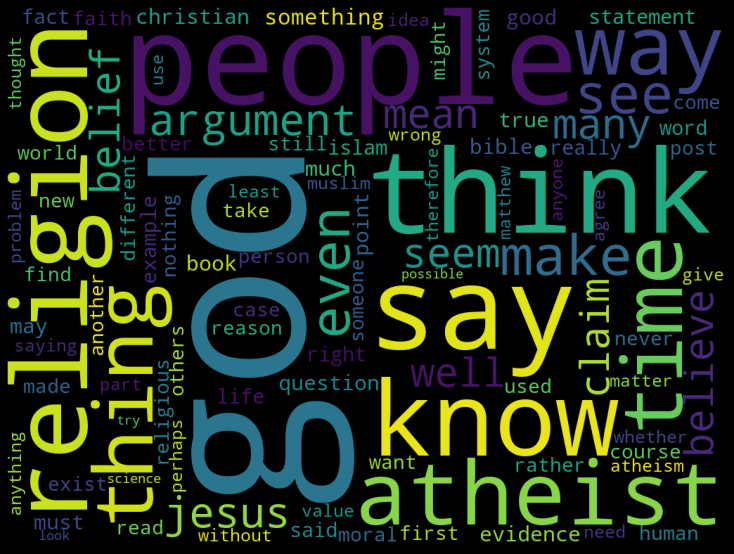

In [7]:
print("Wordcloud for Atheism Newsgroup")
string = ""
for i in traindf.loc[traindf['Target'].isin([0])]["Data"]:
    string = string + " " + i
wordcloud = WordCloud(background_color="black",max_words=100,width=1024,height=768).generate(string)
fig = plt.figure(figsize = [10,13],facecolor = "k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud);

Wordcloud for Computer Hardware Newsgroup


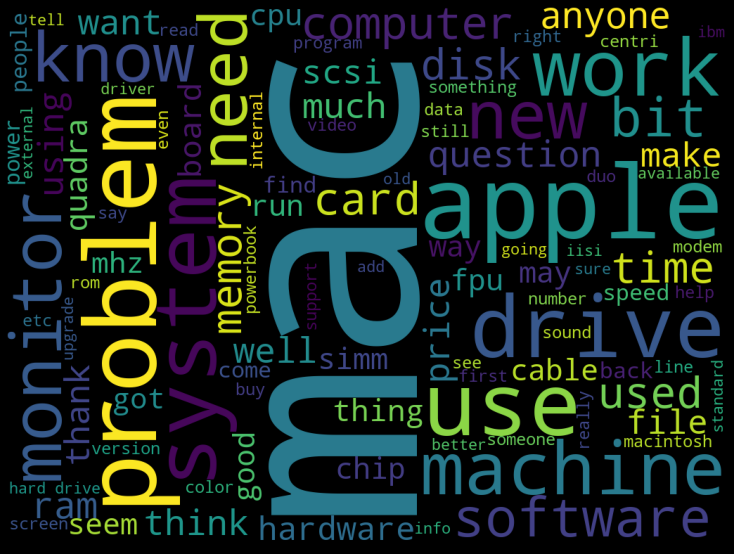

In [8]:
print("Wordcloud for Computer Hardware Newsgroup")
string = ""
for i in traindf.loc[traindf['Target'].isin([4])]["Data"]:
    string = string + " " + i
wordcloud = WordCloud(background_color="black",max_words=100,width=1024,height=768).generate(string)
fig = plt.figure(figsize = [10,13],facecolor = "k")
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wordcloud);

In [9]:
# Get a Map from words to integers and vice-versa
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(strip_accents="ascii",max_df=0.2,min_df=10,max_features = 15000)
X = vectorizer.fit_transform(traindf["Data"]) # X is a matrix containing word counts for each doc
Y = traindf["Target"].to_numpy()
vocabulary = vectorizer.vocabulary_
# This maps from indices to Words
indWord = vectorizer.get_feature_names()
# This maps from words to indices
wordIndex = {}
for i,word in enumerate(indWord):
    wordIndex[word] = i

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
# Get a list of documents with numbers instead of words
docs = []
y = []
for i,row in enumerate(X.toarray()):
    words = np.where(row != 0)[0] # Get all the indices where word counts are not zero
    if len(words) == 0: continue # Skip Empty documents
    doc = []
    for i in words:
        doc += [i]*row[i]
    doc = np.array(doc)
    docs.append(doc)
    y.append(Y[i])
# Get parameters of the Corpus
D = len(docs) # Number of documents
V = len(vocabulary) # Number of words in the vocabulary
T = 20 # Number of topics 
N = np.array([len(doc) for doc in docs])
alpha = 1/(2*T)
beta = 1/(2*T)

In [20]:
# List the parameters for Gibbs Sampling
topics = [np.random.randint(low = 0,high = T,size = N[d]) for d in range(D)]  
docTopic = np.zeros((D, T))
topicWord = np.zeros((T, V))
topicCount = np.zeros((T))

## Initialize the parameters
for d in range(D):  
    for t in range(T):
        docTopic[d,t] = len(np.where(topics[d] == t)[0])
        topicCount[t] += docTopic[d,t]
    for i,word in enumerate(docs[d]):
        topicWord[topics[d][i],word] += 1

In [21]:
# Perform Iterations of Gibbs Sampling
for iteration in tqdm(range(50)):
    for d in range(D):
        for i,word in enumerate(docs[d]):
            # Current Topic
            topic = topics[d][i]
            # Decrement counts for current word
            docTopic[d][topic] -= 1
            topicWord[topic,word] -= 1
            topicCount[topic] -= 1

            # Sample new topic for current word
            pDoc = (docTopic[d] + alpha)/(N[d] - 1 + T*alpha)
            pTopic = (topicWord[:,word] + beta)/(topicCount + V*beta)
            p = pDoc * pTopic
            p /= np.sum(p)
            newTopic = np.argmax(np.random.multinomial(1, p))

            # Set the new topic
            topics[d][i] = newTopic
            docTopic[d][newTopic] += 1
            topicWord[newTopic,word] += 1
            topicCount[newTopic] += 1

100%|██████████| 50/50 [1:02:39<00:00, 75.18s/it]


In [22]:
docTopic /= np.sum(docTopic,axis = 1,keepdims=True)
topicWord /= np.sum(topicWord,axis = 1,keepdims=True)

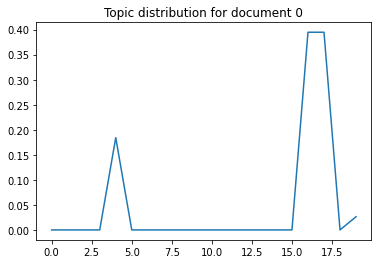

In [23]:
# We can look at the topic distribution for a document
i = 0
plt.plot(docTopic[i]);
plt.title("Topic distribution for document {}".format(i));

In [24]:
# We can also look at the most common word for various topics
print("Common Words for topics")
for t in range(T):
    txt = f"Topic {t}: " + " ".join([indWord[w] for w in topicWord[t].argsort()[:-11:-1]])
    print(txt)

Common Words for topics
Topic 0: game year team player last run hit good think time
Topic 1: window system use file server application program card version problem
Topic 2: state bill file gun firearm price law use may new
Topic 3: bit problem scsi card mac use system work window mhz
Topic 4: drive disk new power use used hard please cable problem
Topic 5: people right gun government law think could say crime case
Topic 6: president government law think said clipper american new going administration
Topic 7: please anyone thanks use could used mail need information line
Topic 8: good group people time post want question mail think please
Topic 9: health medical study patient disease drug year research university doctor
Topic 10: key use chip bit message system encryption number algorithm used
Topic 11: space earth nasa launch system satellite mission orbit shuttle year
Topic 12: file image program ftp format graphic available jpeg list data
Topic 13: book church new theory catholic man

In [25]:
!pip install pyldavis
import pyLDAvis
data = {
    "topic_term_dists" : topicWord,
    "doc_topic_dists" : docTopic,
    "doc_lengths" : N,
    "vocab" : indWord,
    "term_frequency" : np.sum(topicWord,axis=0)
}
vis = pyLDAvis.prepare(**data)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [26]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)